In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

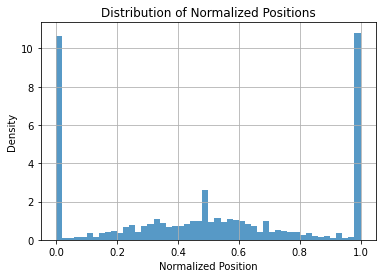

In [2]:

folder_path = 'null_elections'
csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

all_positions = []

for file in csv_files:
    df = pd.read_csv(file)
    # Step 2: Normalize the 'position' column to the range 0 to 1
    min_position = df['position'].min()
    max_position = df['position'].max()
    df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)
    all_positions.extend(df['normalized_position'].values)

# Step 3: Aggregate the normalized positions from all files
all_positions = np.array(all_positions)

# Step 4: Find the distribution of these normalized positions
plt.hist(all_positions, bins=50, density=True, alpha=0.75)
plt.xlabel('Normalized Position')
plt.ylabel('Density')
plt.title('Distribution of Normalized Positions')
plt.grid(True)
plt.show()


Total number of files at level FEDERAL: 13


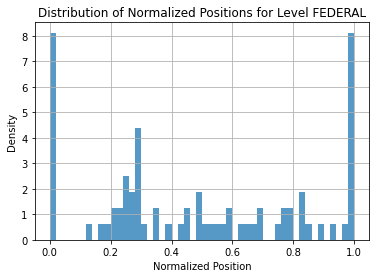

Total number of files at level STATE: 58


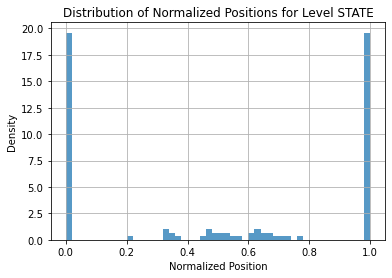

Total number of files at level LOCAL: 338


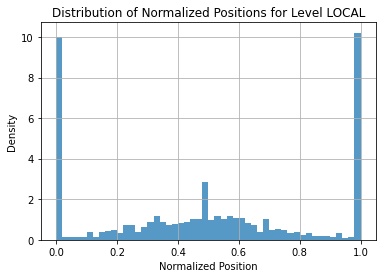

In [5]:


all_positions = []

for file in csv_files:
    df = pd.read_csv(file)
    min_position = df['position'].min()
    max_position = df['position'].max()
    df['normalized_position'] = (df['position'] - min_position) / (max_position - min_position)
    df['filename'] = os.path.basename(file)  # Add filename to the DataFrame
    all_positions.append(df)

# Combine all positions into a single DataFrame
all_positions_df = pd.concat(all_positions, ignore_index=True)

# Step 2: Load the additional file containing filenames and levels
additional_file = 'permissive.csv'
filename_level_df = pd.read_csv(additional_file)

# Step 3: Merge the normalized positions DataFrame with the filename-level file
merged_df = pd.merge(all_positions_df, filename_level_df, on='filename')

# Step 4: Plot the distribution for each level
levels = merged_df['level'].unique()

for level in levels:
    subset = merged_df[merged_df['level'] == level]
    num_files = subset['filename'].nunique()
    print(f"Total number of files at level {level}: {num_files}")
    if not subset.empty:
        plt.figure()
        plt.hist(subset['normalized_position'], bins=50, density=True, alpha=0.75)
        plt.xlabel('Normalized Position')
        plt.ylabel('Density')
        plt.title(f'Distribution of Normalized Positions for Level {level}')
        plt.grid(True)
        plt.show()
